In [350]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time
import matplotlib.cm as cm

In [372]:
#physical susceptibility
def physical_susc(U, JUratio,suscall):
    J = JUratio*U
    U1 = U-2*J
    J1 = J
    o=5
    inter=np.zeros((o**2,o**2), dtype=complex)
    lis = []
    for i in range(o**2):
        inter[i,i] = U1
    for i in range(o):
        param = o*i+i
        lis.append(param)
        inter[param,param]=U
    for k in lis:
        for m in lis:
            if m !=k:
                inter[k,m] = J
    for k in range(o):
        for m in range(o):
            A = o*k+m
            B = o*m+k
            if m !=k:
                inter[A,B] = J1
    inter5=inter
    
    Co = np.zeros((80,80),dtype=complex)
    Co[0:5,0:5] = inter5[0:5,0:5]
    Co[16:21,16:21] = inter5[5:10,5:10]
    Co[32:37,32:37] = inter5[10:15,10:15]
    Co[48:53,48:53] = inter5[15:20,15:20]
    Co[64:69,64:69] = inter5[20:25,20:25]
    Co[0:5,16:21] = inter5[0:5,5:10]
    Co[0:5,32:37] = inter5[0:5,10:15]
    Co[0:5,48:53] = inter5[0:5,15:20]
    Co[0:5,64:69] = inter5[0:5,20:25]
    Co[16:21,0:5] = inter5[5:10,0:5]
    Co[16:21,32:37] = inter5[5:10,10:15]
    Co[16:21,48:53] = inter5[5:10,15:20]
    Co[16:21,64:69] = inter5[5:10,20:25]
    Co[32:37,0:5] = inter5[10:15,0:5]
    Co[32:37,16:21] = inter5[10:15,5:10]
    Co[32:37,48:53] = inter5[10:15,15:20]
    Co[32:37,64:69] = inter5[10:15,20:25]
    Co[48:53,0:5] = inter5[15:20,0:5]
    Co[48:53,16:21] = inter5[15:20,5:10]
    Co[48:53,32:37] = inter5[15:20,10:15]
    Co[48:53,64:69] = inter5[15:20,20:25]
    Co[64:69,0:5] = inter5[20:25,0:5]
    Co[64:69,16:21] = inter5[20:25,5:10]
    Co[64:69,32:37] = inter5[20:25,10:15]
    Co[64:69,48:53] = inter5[20:25,15:20]
    
    As = np.zeros((48,48),dtype=complex)

    INT_inter = np.zeros((269,269),dtype=complex)
    INT=np.zeros((256,256),dtype=complex)
    INT_inter[0:80,0:80] = Co
    INT_inter[85:165,85:165] = Co
    INT_inter[170:218,170:218] = As
    INT_inter[221:269,221:269] = As
    INT = INT_inter[0:256,0:256]

    o=16
    print(np.shape(suscall))
    susc_resh=np.reshape(np.transpose(suscall), (o**2,o**2))
    inver = np.dot(np.linalg.inv(np.identity(o**2) - np.dot((susc_resh), INT)), susc_resh)
    
    #physical
    lis = []
    for i in range(o):
        lis.append(o*i+i)
    susc_phys_component = []
    for i in lis:
        for k in lis:
            susc_phys_component.append(inver[k][i])
    susc_phys=0.5*np.imag(susc_phys_component)
    #susc_phys=0.5*np.real((np.sum(susc_phys_component)))
    #print(np.max(np.imag(susc_phys_component)))
    #print(np.max(np.real(susc_phys_component)))
    return susc_phys

In [1]:
my_path = f"C:/Users/amnedic/Documents/GitHub/RPA_SrCo2As2/results/MG+GXP+PNG_PD_13.40_to_12.00/"

(65536,)


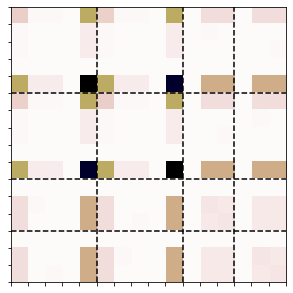

In [354]:
#Gamma

suscall = []

fil=13.0
JUratio=0
suscall = np.loadtxt(my_path+'MGnumba_N=25_fil='+str(fil)+'_q=20.dat', dtype=complex)
perc=0.995
U=2.103374863*perc

# fil=13.0
# JUratio=0.2
# suscall = np.loadtxt(my_path+'MGnumba_N=25_fil='+str(fil)+'_q=20.dat', dtype=complex)
# perc=0.995
# U=1.821219695*perc

# fil=13.0
# JUratio=0.4
# suscall = np.loadtxt(my_path+'MGnumba_N=25_fil='+str(fil)+'_q=20.dat', dtype=complex)
# perc=0.995
# U=1.52994898*perc

# fil=12.8
# JUratio=0
# suscall = np.loadtxt(my_path+'MGnumba_N=25_fil='+str(fil)+'_q=20.dat', dtype=complex)
# perc=0.995
# U=3.046128726*perc

# fil=12.
# JUratio=0.
# suscall = np.loadtxt(my_path+'MGnumba_N=25_fil='+str(fil)+'_q=20.dat', dtype=complex)
# perc=0.995
# U=3.665226746*perc

x=fil-13.
qnt=0
susc_p = physical_susc(U,JUratio,suscall)
full = np.reshape(susc_p, (16,16))

width = 1.5*3.375
height = width
x_min = 0
x_max = 17
y_min = 0
y_max = 17
deltax = 1
deltay = 1

fig = plt.figure(1, figsize = [width,height])
ax = fig.add_subplot(111)
plt.gca().xaxis.tick_bottom()
plt.hlines(y=11., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=6., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=3., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=13., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=10., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=5., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)

#ticks
grid_x_ticks = np.arange(x_min, x_max)
grid_y_ticks = np.arange(y_min, y_max, deltay)
ax.set_xticks(grid_x_ticks , minor=False)
ax.set_yticks(grid_y_ticks, minor=False)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

import matplotlib.colors as mcolors
plt.imshow(full/np.amax(full), extent=[0,16,0,16], cmap=cm.gist_earth_r, vmin=0, vmax=1)
#cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
gammaplot = full/np.amax(full)
plt.show()
#fig.savefig('G1.pdf', bbox_inches='tight', dpi=2000)
#fig.savefig('Gamma_x_'+str(x)+'_JUratio_'+str(JUratio)+'.pdf', bbox_inches='tight', dpi=2000)

In [348]:
#fig.savefig('Orb_content/Gamma_x='+str(np.round(fil-13,2))+'_JUratio='+str(JUratio)+'_U='+str(perc)+'Uc.pdf', bbox_inches='tight', dpi=2000)

(65536,)


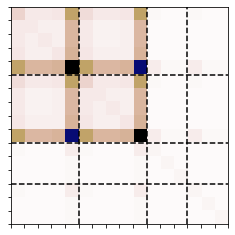

In [329]:
#M
# fil=12.6
# JUratio=0.2
# suscall = np.loadtxt(my_path+'MGnumba_N=25_fil='+str(fil)+'_q=0.dat', dtype=complex)
# perc = 0.995
# U=3.587174213*perc

fil=12.7
JUratio=0.2
suscall = np.loadtxt(my_path+'MGnumba_N=25_fil='+str(fil)+'_q=0.dat', dtype=complex)
perc = 0.995
U=3.438379139*perc

x=fil-13.
qnt=0
susc_p = physical_susc(U,JUratio,suscall)
full = np.abs(np.reshape(susc_p, (16,16)))
full_plot = plt.figure()

width = 1.5*3.375
height = width
x_min = 0
x_max = 17
y_min = 0
y_max = 17
deltax = 1
deltay = 1

fig = plt.figure(1, figsize = [width,height])
ax = fig.add_subplot(111)
plt.gca().xaxis.tick_bottom()
plt.hlines(y=11., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=6., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=3., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=13., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=10., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=5., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)

#ticks
grid_x_ticks = np.arange(x_min, x_max)
grid_y_ticks = np.arange(y_min, y_max, deltay)
ax.set_xticks(grid_x_ticks , minor=False)
ax.set_yticks(grid_y_ticks, minor=False)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.imshow(np.abs(full)/np.amax(full), extent=[0,16,0,16], cmap=cm.gist_earth_r, vmin=0, vmax=1)
#cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
plt.show()
#fig.savefig('M_x_'+str(x)+'_JUratio_'+str(JUratio)+'.pdf', bbox_inches='tight', dpi=2000)
#fig.savefig('M1.pdf', bbox_inches='tight', dpi=2000)

In [330]:
arr=np.array(full/np.amax(full))
np.savetxt('Orb_content/M_x='+str(np.round(fil-13,2))+'_JUratio='+str(JUratio)+'_U='+str(perc)+'Uc.csv', arr,  delimiter = ",")
fig.savefig('Orb_content/M_x='+str(np.round(fil-13,2))+'_JUratio='+str(JUratio)+'_U='+str(perc)+'Uc.pdf', bbox_inches='tight', dpi=2000)

(65536,)


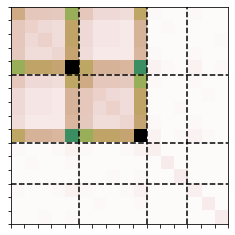

In [316]:
#X=30
# fil=12.78
# JUratio=0.3
# suscall = np.loadtxt(my_path+'GXPnumba_N=25_fil='+str(fil)+'_q=30.dat', dtype=complex)
# U=2.870465869*0.995

# fil=12.78
# JUratio=0.49
# suscall = np.loadtxt(my_path+'GXPnumba_N=25_fil='+str(fil)+'_q=30.dat', dtype=complex)
# U=2.339337671*0.995

fil=12.8
JUratio=0.4
suscall = np.loadtxt(my_path+'GXPnumba_N=25_fil='+str(fil)+'_q=30.dat', dtype=complex)
perc=0.995
U=2.36055463*perc

x=fil-13.
qnt=0
susc_p = physical_susc(U,JUratio,suscall)
full = np.abs(np.reshape(susc_p, (16,16)))
full_plot = plt.figure()

width = 1.5*3.375
height = width
x_min = 0
x_max = 17
y_min = 0
y_max = 17
deltax = 1
deltay = 1

fig = plt.figure(1, figsize = [width,height])
ax = fig.add_subplot(111)
plt.gca().xaxis.tick_bottom()
plt.hlines(y=11., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=6., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=3., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=13., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=10., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=5., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)

#ticks
grid_x_ticks = np.arange(x_min, x_max)
grid_y_ticks = np.arange(y_min, y_max, deltay)
ax.set_xticks(grid_x_ticks , minor=False)
ax.set_yticks(grid_y_ticks, minor=False)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.imshow(full/np.amax(full), extent=[0,16,0,16], cmap=cm.gist_earth_r, vmin=0, vmax=1)
#cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
xplot = full/np.amax(full)

plt.show()
#fig.savefig('X_x_'+str(x)+'_JUratio_'+str(JUratio)+'.pdf', bbox_inches='tight', dpi=2000)
#ig.savefig('X1.pdf', bbox_inches='tight', dpi=2000)

In [174]:
arr=np.array(full/np.amax(full))
#np.savetxt('Orb_content/X_x='+str(np.round(fil-13,2))+'_JUratio='+str(JUratio)+'_U='+str(perc)+'Uc.csv', arr,  delimiter = ",")
#fig.savefig('Orb_content/X_x='+str(np.round(fil-13,2))+'_JUratio='+str(JUratio)+'_U='+str(perc)+'Uc.pdf', bbox_inches='tight', dpi=2000)

(65536,)


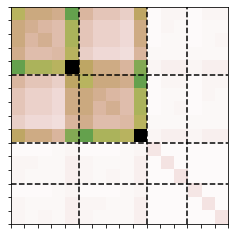

In [331]:
#P=40
# fil=12.6
# JUratio=0.49
# suscall = np.loadtxt(my_path+'GXPnumba_N=25_fil='+str(fil)+'_q=40.dat', dtype=complex)
# U=2.527944183*0.995

# fil=12.6
# JUratio=0.4
# suscall = np.loadtxt(my_path+'GXPnumba_N=25_fil='+str(fil)+'_q=40.dat', dtype=complex)
# perc=0.995
# U=2.770749098*perc

fil=12.7
JUratio=0.4
suscall = np.loadtxt(my_path+'GXPnumba_N=25_fil='+str(fil)+'_q=40.dat', dtype=complex)
perc=0.995
U=2.6442882*perc


x=fil-13.
qnt=0
susc_p = physical_susc(U,JUratio,suscall)
full = np.abs(np.reshape(susc_p, (16,16)))
full_plot = plt.figure()

width = 1.5*3.375
height = width
x_min = 0
x_max = 17
y_min = 0
y_max = 17
deltax = 1
deltay = 1

fig = plt.figure(1, figsize = [width,height])
ax = fig.add_subplot(111)
plt.gca().xaxis.tick_bottom()
plt.hlines(y=11., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=6., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.hlines(y=3., xmin=0, xmax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=13., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=10., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)
plt.vlines(x=5., ymin=0, ymax=16, color='k', linestyle='dashed', alpha=1)

#ticks
grid_x_ticks = np.arange(x_min, x_max)
grid_y_ticks = np.arange(y_min, y_max, deltay)
ax.set_xticks(grid_x_ticks , minor=False)
ax.set_yticks(grid_y_ticks, minor=False)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.imshow(full/np.amax(full), extent=[0,16,0,16], cmap=cm.gist_earth_r, vmin=0, vmax=1)
#cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
plt.show()
#fig.savefig('P_x_'+str(x)+'_JUratio_'+str(JUratio)+'.pdf', bbox_inches='tight', dpi=2000)
#fig.savefig('P1.pdf', bbox_inches='tight', dpi=2000)

In [332]:
arr=np.array(full/np.amax(full))
#np.savetxt('Orb_content/P_x='+str(np.round(fil-13,2))+'_JUratio='+str(JUratio)+'_U='+str(perc)+'Uc.csv', arr,  delimiter = ",")
#fig.savefig('Orb_content/P_x='+str(np.round(fil-13,2))+'_JUratio='+str(JUratio)+'_U='+str(perc)+'Uc.pdf', bbox_inches='tight', dpi=2000)